# 模型正则化

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x ** 2 + x + 2 + np.random.normal(0, 1, 100)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=50)),  #多项式的特征
    ("std_scaler", StandardScaler()),  #数据的归一化
    ("lin_reg", LinearRegression())  #线性回归
])
poly_reg.fit(X_train, y_train)

y_poly_reg_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_poly_reg_predict)

2.768462979596748

In [37]:
def plot_model(model):
    X_plot = np.linspace(-3, 3, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    
    plt.scatter(x, y)
    plt.plot(X_plot[:,0], y_plot, color='r')
    plt.axis([-3, 3, 0, 6])
    plt.show()

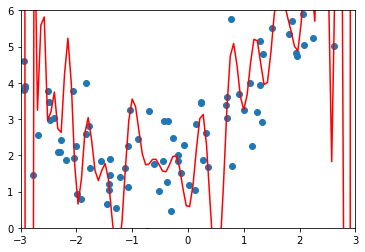

In [38]:
plot_model(poly_reg)

## 岭回归

加入模型正则化：$\alpha\frac12\sum_{i=1}^n\theta_i^2$

In [27]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)

def RidgeReg(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),  #多项式的特征
        ("std_scaler", StandardScaler()),  #数据的归一化
        ("ridge_reg", Ridge(alpha=alpha))  #线性回归
    ])

In [32]:
ridge_reg = RidgeReg(20, 0.01)
ridge_reg.fit(X_train, y_train)

y_ridge_reg_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y_ridge_reg_predict)

1.562869419596319

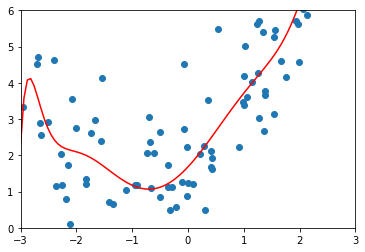

In [33]:
plot_model(ridge_reg)

In [34]:
ridge_reg = RidgeReg(20, 1)
ridge_reg.fit(X_train, y_train)

y_ridge_reg_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y_ridge_reg_predict)

0.978463624628117

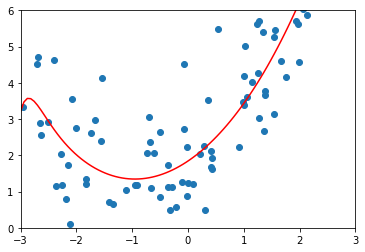

In [35]:
plot_model(ridge_reg)

## LASSO回归

加入模型正则化：$\alpha\sum_{i=1}^n|\theta_i|$

In [39]:
from sklearn.linear_model import Lasso

def LassoReg(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),  #多项式的特征
        ("std_scaler", StandardScaler()),  #数据的归一化
        ("lasso_reg", Lasso(alpha=alpha))  #线性回归
    ])

In [42]:
lasso_reg = LassoReg(20, 0.01)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

1.0719380524630362

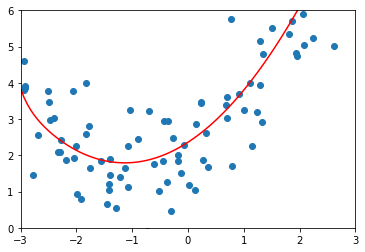

In [43]:
plot_model(lasso_reg)

In [46]:
lasso_reg = LassoReg(20,1)
lasso_reg.fit(X_train, y_train)

y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

2.768814336681751

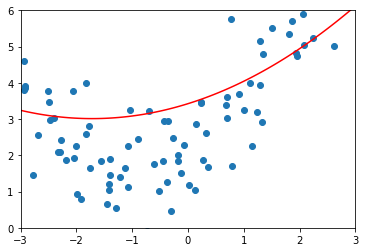

In [47]:
plot_model(lasso_reg)

### LASSO趋向于使得一部分$\theta$变为0，因此可做特征选择用

## 弹性网络

### $L_p$范数：$||x||_p=(\sum_{i=1}^n|x_i|^p)^{\frac1p}$

### 弹性网正则项：$r\alpha\sum_{i=1}^n{|\theta_i|}+\frac{1-r}2\sum_{i=1}^n\theta_i^2$